In [6]:
from google.colab import drive
drive.mount('/content/drive')
import nltk
nltk.download ('punkt')
from nltk.tokenize import word_tokenize
!pip uninstall spacy -y 
!pip install -U spacy>=3.0
!python -m spacy download ru_core_news_md
import spacy
nlp = spacy.load('ru_core_news_md')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Found existing installation: spacy 3.3.0
Uninstalling spacy-3.3.0:
  Successfully uninstalled spacy-3.3.0
  Using cached https://github.com/explosion/spacy-models/releases/download/ru_core_news_md-3.3.0/ru_core_news_md-3.3.0-py3-none-any.whl (41.9 MB)
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_md')


In [5]:
path ='/content/drive/My Drive/rus_five.txt' 
text = open(path, encoding='utf-8').read()
document = nlp(text)
outname = path.replace('.txt', '-lemmatized.txt') 
with open(outname, 'w', encoding='utf8') as out:
    for token in document:
        out.write(token.lemma_.lower())
        out.write(' ')

In [12]:
path ='/content/drive/My Drive/rus_five-lemmatized.txt' 
text = open(path, encoding='utf-8').read()
tokens = nltk.word_tokenize(text)
print (tokens)

['как', 'составить', 'план', 'текст', '1', '.', 'внимательно', 'прочитайте', 'текст', '.', 'подумать', ',', 'о', 'что', 'гово', '-', 'рится', 'в', 'этот', 'текст', '.', '2', '.', 'определить', 'тема', 'и', 'основный', 'мысль', 'текст', '.', '3', '.', 'выделить', 'смысловой', 'часть', '(', 'микротемы', ')', '.', 'как', 'прави¬ло', ',', 'одна', 'смысловой', 'часть', 'отделить', 'от', 'другой', 'с', 'помощь', 'абзац', '.', 'сколько', 'абзац', '—', 'столько', 'смысловой', 'часть', '(', 'ми¬кротем', ')', '.', '4', '.', 'озаглавить', 'каждый', 'смысловой', 'часть', '(', 'микротему', ')', '.', 'за', '-', 'головок', 'мочь', 'быть', 'сформулировать', 'в', 'вид', 'вопросительно¬го', 'или', 'повествовательный', 'предложение', '.', 'использовать', 'также', 'предложение', 'из', 'текст', ',', 'заключить', 'их', 'в', 'кавычки', '.', '5', '.', 'стараться', 'при', 'составление', 'план', 'использовать', 'какой', '-', 'либо', 'один', 'вид', 'оформление', 'заголовок', 'смысловой', 'ча¬стей', '.', '6', '.'

In [13]:
import gensim
from gensim import corpora

[(',', 6976), ('.', 6743), ('в', 1833), ('и', 1561), (')', 1443), ('—', 1257), ('?', 1157), ('слово', 1052), ('``', 964), ('(', 769), (':', 647), ('на', 634), ('-', 632), ('текст', 588), ('что', 525), ('с', 504), ('какой', 502), ('предложение', 481), ('1', 471), (']', 453), ('2', 449), ('[', 435), ('как', 431), ('по', 424), (';', 407), ('из', 388), ('к', 378), ('прочитайте', 375), ('этот', 357), ('а', 356), ('не', 353), ('речь', 329), ('вы', 301), ('или', 292), ('3', 286), ('о', 283), ('их', 254), ('язык', 248), ('...', 248), ('!', 242), ('его', 230), ('звук', 226), ('быть', 225), ('это', 211), ('свой', 196), ('мочь', 193), ('’', 193), ('4', 184), ('ли', 169), ('они', 169)]


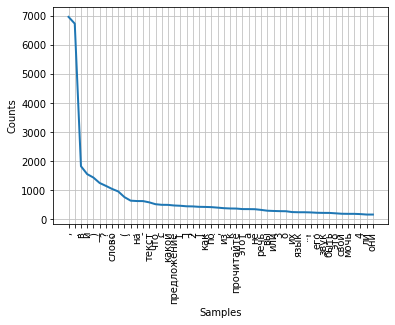

In [14]:
#до чистки от стоп-слов и символов
import nltk
from nltk.probability import FreqDist
freq = nltk.FreqDist(tokens)
fdist = FreqDist(tokens)
print(fdist.most_common(50)) 
fdist.plot(50,cumulative=False)

In [15]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')
#print (stop_words)
stop_words.extend(['этот','весь','для','было','стать','что','был', 'была','это', 'свой','как', 'его', 'только','тот', 'однако', 'под', 'также', 'который', 'тыс','как', 'на', 'по' ])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
filtered_tokens = []
for token in tokens:
  if token not in stop_words:
    filtered_tokens.append(token)
print (filtered_tokens)

['составить', 'план', 'текст', '1', '.', 'внимательно', 'прочитайте', 'текст', '.', 'подумать', ',', 'гово', '-', 'рится', 'текст', '.', '2', '.', 'определить', 'тема', 'основный', 'мысль', 'текст', '.', '3', '.', 'выделить', 'смысловой', 'часть', '(', 'микротемы', ')', '.', 'прави¬ло', ',', 'одна', 'смысловой', 'часть', 'отделить', 'помощь', 'абзац', '.', 'сколько', 'абзац', '—', 'столько', 'смысловой', 'часть', '(', 'ми¬кротем', ')', '.', '4', '.', 'озаглавить', 'каждый', 'смысловой', 'часть', '(', 'микротему', ')', '.', '-', 'головок', 'мочь', 'сформулировать', 'вид', 'вопросительно¬го', 'повествовательный', 'предложение', '.', 'использовать', 'предложение', 'текст', ',', 'заключить', 'кавычки', '.', '5', '.', 'стараться', 'составление', 'план', 'использовать', '-', 'либо', 'вид', 'оформление', 'заголовок', 'смысловой', 'ча¬стей', '.', '6', '.', 'расположить', 'заголовок', 'порядок', ',', 'расположены', 'смысловой', 'часть', 'текст', '.', '7', '.', 'записать', 'заголовок', '.', 'пла

In [17]:
lema=[w for w in filtered_tokens if w.isalpha() and len(w)>2]

[('слово', 1052), ('текст', 588), ('предложение', 481), ('прочитайте', 375), ('речь', 329), ('язык', 248), ('звук', 226), ('мочь', 193), ('буква', 163), ('почему', 160), ('значение', 153), ('согласный', 150), ('русский', 149), ('часть', 137), ('найти', 136), ('записать', 134), ('мысль', 118), ('человек', 117), ('вопрос', 117), ('написать', 116), ('сочинение', 115), ('первый', 109), ('тема', 107), ('каждый', 103), ('рассказ', 103), ('предмет', 102), ('пример', 98), ('лес', 98), ('которые', 97), ('говорить', 93), ('основный', 90), ('составить', 88), ('сказка', 88), ('назвать', 87), ('ваш', 85), ('план', 83), ('обозначать', 83), ('объяснить', 82), ('автор', 82), ('определить', 80), ('описание', 78), ('друг', 77), ('знак', 76), ('выписать', 75), ('словарь', 75), ('главный', 74), ('словосочетание', 74), ('указать', 73), ('рассказать', 72), ('член', 72)]


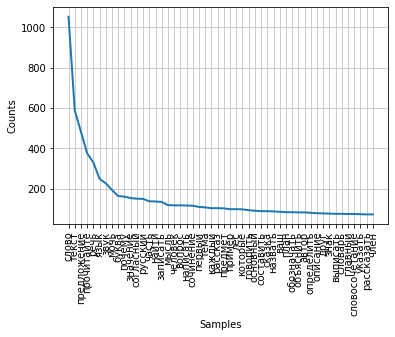

In [19]:
from nltk import FreqDist
freq = nltk.FreqDist(lema)
fdist = FreqDist(lema)
print(fdist.most_common(50)) 
fdist.plot(50,cumulative=False)

[(('русский', 'язык'), 84), (('прочитайте', 'текст'), 79), (('основный', 'мысль'), 64), (('значение', 'слово'), 53), (('прочитайте', 'отрывок'), 50), (('тип', 'речь'), 44), (('знак', 'препинание'), 33), (('согласный', 'звук'), 32), (('пропущенные', 'буква'), 30), (('тема', 'основный'), 29), (('предложение', 'текст'), 28), (('член', 'предложение'), 28), (('лексический', 'значение'), 28), (('слово', 'которые'), 27), (('связь', 'предложение'), 27), (('прямой', 'речь'), 27), (('мысль', 'текст'), 25), (('привести', 'пример'), 24), (('часть', 'речь'), 23), (('вставлять', 'пропущенные'), 23), (('прочитайте', 'стихотворение'), 22), (('сделать', 'вывод'), 21), (('прочитайте', 'слово'), 21), (('слово', 'автор'), 21), (('списать', 'предложение'), 21), (('однородный', 'член'), 21), (('гласный', 'звук'), 21), (('объяснить', 'почему'), 20), (('составить', 'план'), 19), (('грамматический', 'основа'), 19), (('сцеплять', 'слово'), 19), (('написать', 'сочинение'), 18), (('толковый', 'словарь'), 18), (('

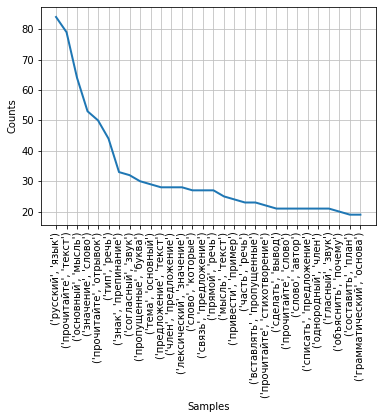

In [22]:
from nltk import FreqDist
bigram = list(nltk.ngrams(lema, 2))
print (FreqDist(bigram).most_common(50))
fdist = FreqDist(bigram)
fdist.plot(30,cumulative=False)

[(('тема', 'основный', 'мысль'), 29), (('основный', 'мысль', 'текст'), 21), (('вставлять', 'пропущенные', 'буква'), 21), (('лексический', 'значение', 'слово'), 18), (('определить', 'тип', 'речь'), 15), (('словарь', 'русский', 'язык'), 13), (('текст', 'обозначить', 'цифра'), 11), (('связь', 'предложение', 'текст'), 10), (('средство', 'связь', 'предложение'), 10), (('прочитайте', 'отрывок', 'рассказ'), 10), (('прочитайте', 'текст', 'найти'), 10), (('прочитайте', 'ещё', 'текст'), 9), (('тип', 'речь', 'текст'), 9), (('прочитайте', 'отрывок', 'стихотворение'), 9), (('предложение', 'прямой', 'речь'), 9), (('главный', 'член', 'предложение'), 8), (('предложение', 'однородный', 'член'), 8), (('вставить', 'пропущенные', 'буква'), 8), (('толкование', 'лексический', 'значение'), 8), (('предложение', 'цель', 'высказывание'), 7), (('второстепенный', 'член', 'предложение'), 7), (('раздел', 'наука', 'язык'), 7), (('главный', 'зависимый', 'слово'), 7), (('грамматический', 'основа', 'предложение'), 7), 

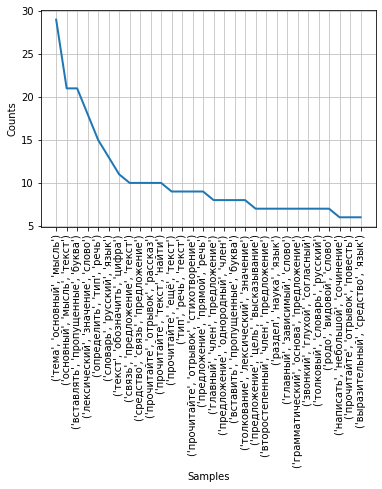

In [23]:
from nltk import FreqDist
trigram = list(nltk.ngrams(lema, 3))
print (FreqDist(trigram).most_common(50))
fdist2 = FreqDist(trigram)
fdist2.plot(30,cumulative=False)